In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import skew, kurtosis


In [271]:
timeframe = '30S'
Type = 'Unweighted'

In [272]:
df_pnl_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/all_strat_single_ib_log_ret_ex_momentum_{timeframe}.csv")
df_pnl_ib = df_pnl_ib[df_pnl_ib['Type'] == Type]
df_pnl_ib.drop(columns=['Type'], inplace=True)
df_pnl_ib.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
df_pnl_ib.drop(columns = ['final_PnL_weighted'], inplace=True)

df_pnl_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/all_strat_single_all_log_ret_ex_momentum_{timeframe}.csv")
df_pnl_all = df_pnl_all[df_pnl_all['Type'] == Type]
df_pnl_all.drop(columns=['Type'], inplace=True)
df_pnl_all.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
df_pnl_all.drop(columns = ['final_PnL_weighted'], inplace=True)

df_pnl_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/all_strat_single_comb_log_ret_ex_momentum_{timeframe}.csv")
df_pnl_comb = df_pnl_comb[df_pnl_comb['Type'] == Type]
df_pnl_comb.drop(columns=['Type'], inplace=True)
df_pnl_comb.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
df_pnl_comb.drop(columns = ['final_PnL_weighted'], inplace=True)

In [273]:
df_pnl_ib.set_index('Ticker', inplace=True)
df_pnl_ib.sort_values('final_PnL', ascending=False, inplace=True)
df_pnl_all.set_index('Ticker', inplace=True)
df_pnl_all.sort_values('final_PnL', ascending=False, inplace=True)
df_pnl_comb.set_index('Ticker', inplace=True)
df_pnl_comb.sort_values('final_PnL', ascending=False, inplace=True)

In [274]:
# df_pnl_ib = df_pnl_ib.replace([np.inf, -np.inf], 0).fillna(0)
# df_pnl_all = df_pnl_all.replace([np.inf, -np.inf], 0).fillna(0)
# df_pnl_comb = df_pnl_comb.replace([np.inf, -np.inf], 0).fillna(0)


In [275]:
df_pnl_ib['final_PnL'] = df_pnl_ib.iloc[:, :-1].sum(axis=1)
df_pnl_all['final_PnL'] = df_pnl_all.iloc[:, :-1].sum(axis=1)
df_pnl_comb['final_PnL'] = df_pnl_comb.iloc[:, :-1].sum(axis=1)

In [276]:
df_pnl_ib

,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-22,2019-01-23,2019-01-24,...,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31,final_PnL
Ticker,,,,,,,,,,,,,,,,,,,,,
MHK,0.023793,0.007724,0.026719,0.017560,0.029387,0.001663,0.016591,0.012970,0.013880,0.032990,...,-0.006176,0.000241,0.026024,-0.010378,0.001904,0.005002,-0.002184,0.008649,0.010832,2.945995
NWSA,-0.032291,0.001060,0.039547,0.031252,0.021952,0.032312,0.006286,0.015615,-0.003418,0.031177,...,0.014373,0.018400,0.018279,-0.003920,-0.000027,0.006801,0.006535,0.006749,0.003326,2.184470
HII,0.021984,0.016172,0.009276,0.032277,0.016392,0.036124,0.033979,0.027139,0.015382,0.033562,...,-0.004324,0.000244,0.012507,0.013052,0.001967,-0.000446,-0.001580,-0.010415,-0.004017,2.111639
RL,0.017443,0.033594,0.028784,-0.003557,0.051437,0.054176,0.060466,0.014205,-0.005318,0.038156,...,0.024827,-0.005714,0.004784,0.009527,0.005453,-0.000854,0.006093,0.019831,0.023434,2.073406
PNW,0.011282,0.025560,0.019525,0.032161,0.020110,0.042446,0.017895,0.032627,-0.020871,0.018640,...,0.021266,-0.000062,0.025898,0.009085,0.010787,0.006303,-0.003183,0.014090,0.005107,1.420911
FFIV,0.008660,0.009718,0.023893,0.012399,0.003886,0.015745,0.036779,-0.004593,0.001025,0.035182,...,0.003891,0.009199,0.020179,0.016679,-0.003303,-0.009542,-0.002212,0.014670,-0.008560,1.366387
FRT,0.028096,0.027597,0.016150,0.045282,0.016771,0.037257,0.036286,0.017099,-0.004570,0.002270,...,0.008447,-0.003922,0.002806,0.006284,-0.006432,-0.003254,-0.003905,-0.000541,0.009287,1.356310
INCY,0.039102,0.022872,0.004330,-0.008855,-0.008418,-0.014294,-0.000327,0.014044,0.015350,0.027340,...,-0.005240,0.008746,0.026790,-0.011024,0.001492,-0.012808,-0.003062,-0.007854,0.004369,1.284319
DVA,0.010740,0.015445,0.001110,0.021071,0.007548,-0.003809,0.033105,-0.010689,0.010637,0.034138,...,0.001839,0.014636,0.007845,0.003323,0.012128,0.005049,0.010723,0.009915,0.012876,1.176402


In [277]:
df_pnl_lst = [df_pnl_all, df_pnl_comb, df_pnl_ib]

In [278]:
def sharpe_test(returns):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator    
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))

    annual_sharpe = np.sqrt(252) * sharpe_ratio
    
    return annual_sharpe, modified_sharpe_stat, p_value

In [279]:
def PPT(df_pnl, label, delta='2min'):
    day_trades = len(df_pnl.columns) - 1
    if delta == '30S':
        n_trades = 659
    if delta == '2min':
        n_trades = 164
    if delta == "10min":
        n_trades = 32
    if delta == '30min':
        n_trades = 10
    if delta == '60min':
        n_trades = 5

    total_trades = n_trades * day_trades

    PPT = df_pnl.iloc[:, -1] / total_trades

    PPT =  PPT.to_frame()

    PPT = PPT * 10000

    PPT.rename(columns={'final_PnL': f'PPT_{label}'}, inplace=True)

    return PPT

In [280]:
label_lst = ['all', 'comb', 'ib']

In [281]:
df = []

for df_pnl, label in zip(df_pnl_lst, label_lst):
    sharpe_ratio_lst = []
    p_value_lst = []
    sharpe_test_lst = []
    for i in range(len(df_pnl)):
        returns = df_pnl.iloc[i, :-1].to_numpy()
        sharpe_ratio, modified_sharpe_stat, p_value = sharpe_test(returns)
        p_value_lst.append(p_value)
        sharpe_test_lst.append(modified_sharpe_stat)
        sharpe_ratio_lst.append(sharpe_ratio)
    
    df_SRtest = pd.DataFrame({'ticker': df_pnl.index.to_list(), f"SR_{label}" : sharpe_ratio_lst, f"test_{label}" :sharpe_test_lst})
    df_SRtest.set_index('ticker', inplace=True)

    PPT_df = PPT(df_pnl, label, delta=timeframe)

    df_SRtest = df_SRtest.merge(PPT_df, left_index=True, right_index=True)

    df_SRtest = df_SRtest.round(2)

    df_SRtest


    df.append(df_SRtest)

df = pd.concat(df, axis=1)


In [282]:
df

,SR_all,test_all,PPT_all,SR_comb,test_comb,PPT_comb,SR_ib,test_ib,PPT_ib
MHK,12.35,12.33,0.18,12.03,11.41,0.18,11.92,11.66,0.18
HII,9.20,10.03,0.13,8.29,8.92,0.12,8.61,8.96,0.13
NWSA,10.82,9.18,0.13,10.48,9.47,0.14,11.60,9.18,0.13
RL,8.01,8.42,0.12,7.42,7.42,0.11,8.18,7.57,0.13
PNW,7.37,7.40,0.09,7.04,7.11,0.09,7.47,7.47,0.09
INCY,5.47,5.02,0.08,6.26,6.23,0.09,5.60,5.50,0.08
FFIV,6.56,6.36,0.08,5.69,5.71,0.07,7.48,7.37,0.08
DVA,5.80,5.16,0.08,4.70,4.47,0.06,5.57,5.45,0.07
FRT,5.71,6.09,0.07,6.67,7.34,0.08,6.78,7.36,0.08
BXP,6.11,6.19,0.06,7.34,7.66,0.07,7.05,7.04,0.07


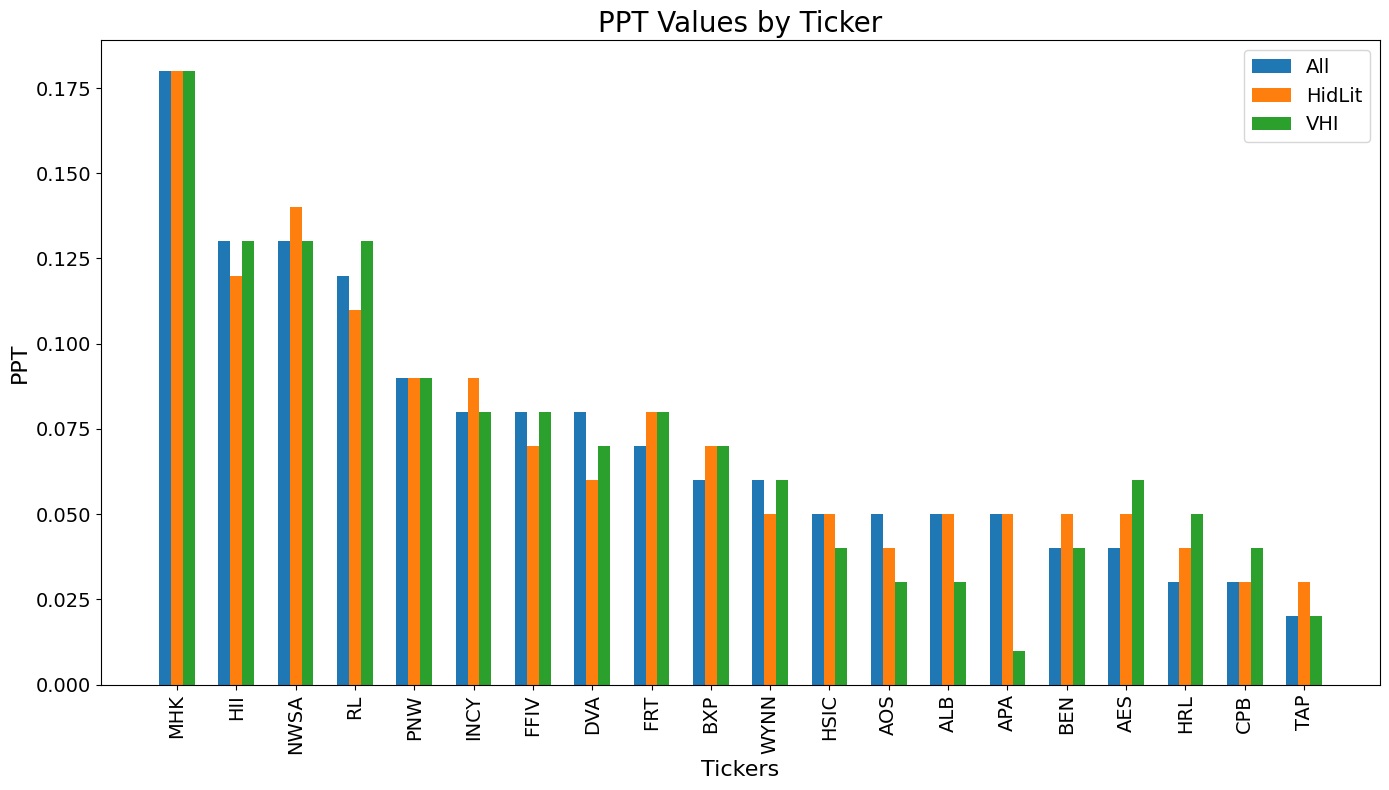

In [283]:
# Assuming df is your DataFrame with tickers as the index

# Define the position of each group of bars on the x-axis
x = range(len(df.index))

# Define the width of each bar
bar_width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each PPT column as a set of bars
ax.bar([pos - bar_width for pos in x], df['PPT_all'], width=bar_width, label='All')
ax.bar(x, df['PPT_comb'], width=bar_width, label='HidLit')
ax.bar([pos + bar_width for pos in x], df['PPT_ib'], width=bar_width, label='VHI')

# Add some text for labels, title and axes ticks with larger font size
ax.set_xlabel('Tickers', fontsize=16)
ax.set_ylabel('PPT', fontsize=16)
ax.set_title('PPT Values by Ticker', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=90, fontsize=14)

# Increase the font size of the legend
ax.legend(fontsize=14)

# Increase the font size of the y-axis tick labels
ax.tick_params(axis='y', labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()

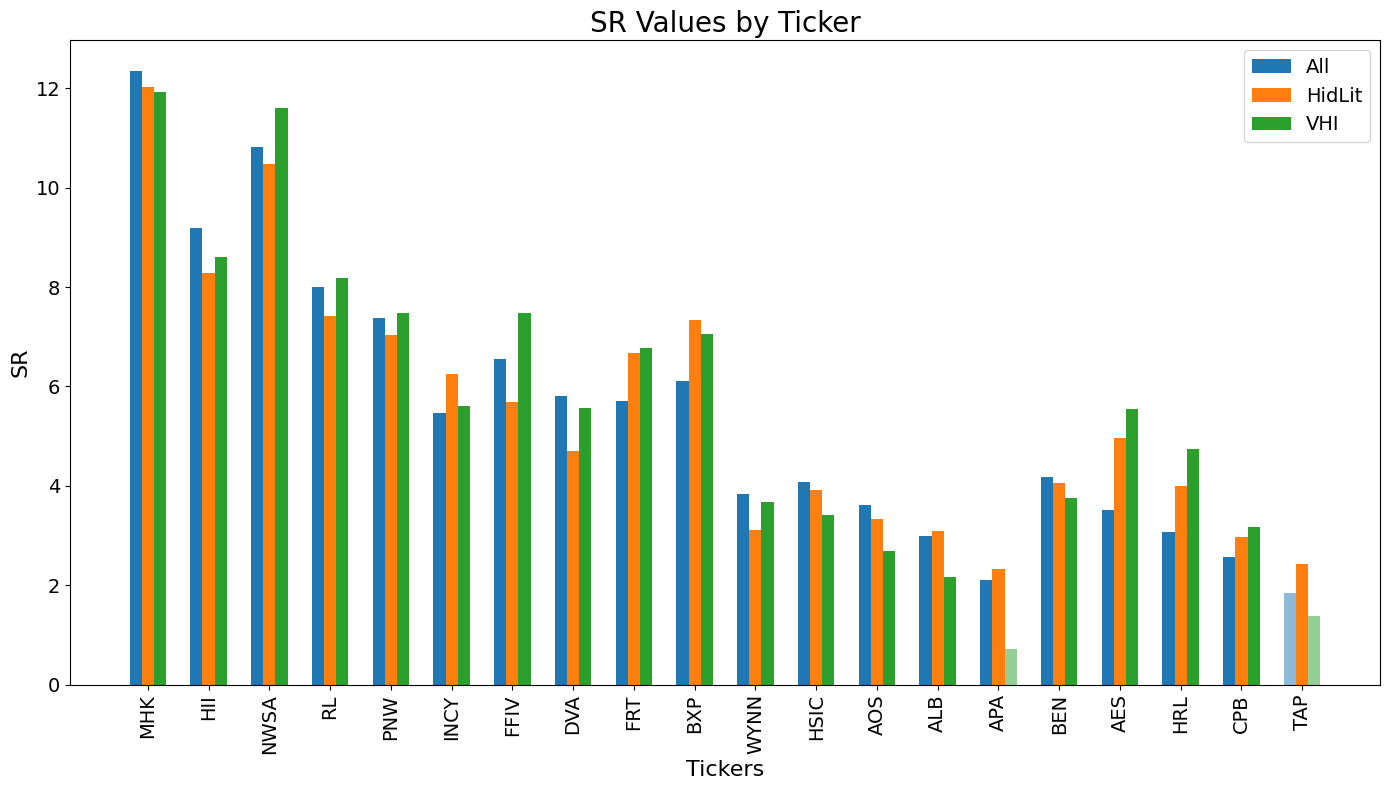

In [284]:
# Assuming df is your DataFrame with tickers as the index and the required columns
# Define the position of each group of bars on the x-axis
x = range(len(df.index))

# Define the width of each bar
bar_width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define the colors for each type of bar
color_all = '#1f77b4'   # Blue
color_comb = '#ff7f0e'  # Orange
color_vhi = '#2ca02c'   # Green

# Plotting each SR column as individual bars with alpha based on the test values
for i, pos in enumerate(x):
    ax.bar(pos - bar_width, df['SR_all'].iloc[i], width=bar_width, label='All' if i == 0 else "", 
           color=color_all, alpha=1 if df['test_all'].iloc[i] > 1.96 else 0.5)
    ax.bar(pos, df['SR_comb'].iloc[i], width=bar_width, label='HidLit' if i == 0 else "", 
           color=color_comb, alpha=1 if df['test_comb'].iloc[i] > 1.96 else 0.5)
    ax.bar(pos + bar_width, df['SR_ib'].iloc[i], width=bar_width, label='VHI' if i == 0 else "", 
           color=color_vhi, alpha=1 if df['test_ib'].iloc[i] > 1.96 else 0.5)

# Add some text for labels, title and axes ticks with larger font size
ax.set_xlabel('Tickers', fontsize=16)
ax.set_ylabel('SR', fontsize=16)
ax.set_title('SR Values by Ticker', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=90, fontsize=14)

# Increase the font size of the legend
ax.legend(fontsize=14)

# Increase the font size of the y-axis tick labels
ax.tick_params(axis='y', labelsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
from prediction_ML_pipeline import save_dataframe_to_folder

In [57]:
import pandas as pd
df1 = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_regression/pred_ClOp_ff_comb.csv")
df2 = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_regression/pred_ClOp_comb_ff_HII.csv")

In [58]:
df1 = df1.drop_duplicates(subset='ticker')
len(df1)

19

In [59]:
len(df1['ticker'])

19

In [60]:
df_comb = pd.concat([df1, df2])
print(len(df_comb))

20


In [61]:
save_dataframe_to_folder(df_comb, "/nfs/home/jingt/dissertation-iceberg/data/output_regression", "pred_ClOp_ff_comb.csv")

DataFrame saved to /nfs/home/jingt/dissertation-iceberg/data/output_regression/pred_ClOp_ff_comb.csv
